In [42]:
# 準備一個測試的矩陣, 你可以當成三筆資料(兩個欄位)
import numpy as np
X = np.array([[1, 4, 5], 
        [4, 2, 8], 
        [5, 8, 3]])
X

array([[1, 4, 5],
       [4, 2, 8],
       [5, 8, 3]])

In [43]:
# 先使用sklearn的PCA來看一下轉換的成果, 變成三筆資料(兩個欄位)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-0.80537496,  2.31330309],
       [-3.51815346, -1.51303103],
       [ 4.32352842, -0.80027206]])

In [44]:
# 新的正交座標軸
pca.components_

array([[ 0.21248047,  0.76706308, -0.60536458],
       [-0.93468378, -0.0211357 , -0.35485139]])

In [45]:
# 我們自己來試一次, 記得要把平均移到0
# 先求Conv
newX = X - X.mean(axis=0)
COV = np.cov(newX.T)
COV

array([[ 4.33333333,  2.66666667, -0.66666667],
       [ 2.66666667,  9.33333333, -7.33333333],
       [-0.66666667, -7.33333333,  6.33333333]])

In [46]:
# 使用特徵值分解分解成三個矩陣, 我把順序換得跟講義一樣
from numpy import linalg as LA
W, V = LA.eig(COV)
Q_T, A, Q = V, np.diag(W), V.T

In [47]:
# eigen value
W

array([ 1.58594653e+01,  4.14053472e+00, -1.98793495e-15])

In [48]:
# 你可以看到三個東西相乘起來就是我們的 COV
Q_T.dot(A).dot(Q)

array([[ 4.33333333,  2.66666667, -0.66666667],
       [ 2.66666667,  9.33333333, -7.33333333],
       [-0.66666667, -7.33333333,  6.33333333]])

In [49]:
# 利用係數取最大的兩個值, 你可以看到得到的兩個軸和sklearn得到的基本上是一樣的(只是方向相反而已)
wq_pair = sorted(zip(W, Q), key=lambda x:x[0], reverse=True)
Q_fil = np.array([v for w, v in wq_pair[:2]])
Q_fil

array([[-0.21248047, -0.76706308,  0.60536458],
       [-0.93468378, -0.0211357 , -0.35485139]])

In [50]:
# 兩個軸是否正交
Q_fil[0].dot(Q_fil[1])

-3.0531133177191805e-16

In [51]:
# 轉換過後得到的值
Q_fil.dot(newX.T).T

array([[ 0.80537496,  2.31330309],
       [ 3.51815346, -1.51303103],
       [-4.32352842, -0.80027206]])

In [52]:
# 轉換回去
newD = Q_fil.dot(newX.T).T
Q_fil.T.dot(newD.T).T

array([[-2.33333333, -0.66666667, -0.33333333],
       [ 0.66666667, -2.66666667,  2.66666667],
       [ 1.66666667,  3.33333333, -2.33333333]])

In [53]:
# 驚訝的發現 根本沒掉太多
newX

array([[-2.33333333, -0.66666667, -0.33333333],
       [ 0.66666667, -2.66666667,  2.66666667],
       [ 1.66666667,  3.33333333, -2.33333333]])

In [54]:
# 轉換過的資料在新的軸上的Cov
np.cov(newD.T)

array([[ 1.58594653e+01, -5.05449900e-16],
       [-5.05449900e-16,  4.14053472e+00]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


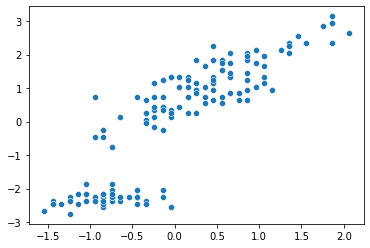

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
partial = iris["data"][:,[0,2]]
partial = partial - partial.mean(axis=0)
sns.scatterplot(partial[:,0], partial[:,1])

(-3.936058516434886, 3.936058516434886) (-9.192793011658665, 9.192793011658665)
(9.192793011658665, -9.192793011658665) (-3.936058516434886, 3.936058516434886)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


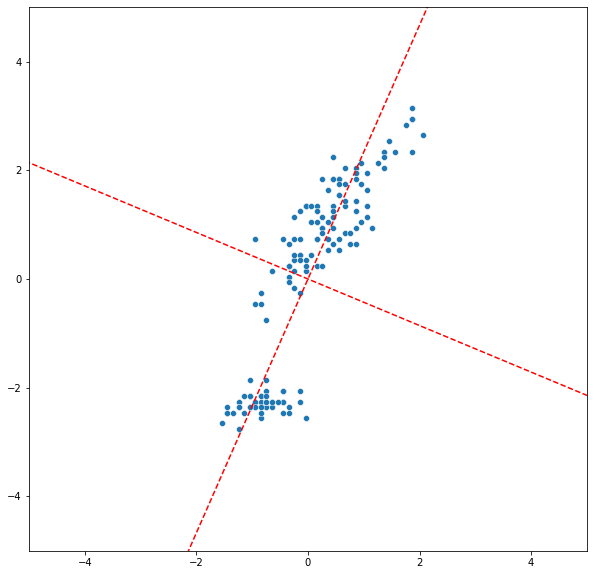

In [81]:
# 新的軸的長相
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new = pca.fit_transform(iris["data"][:, [0, 2]])
axis = pca.components_
plt.figure(figsize=(10, 10))
sns.scatterplot(partial[:,0], partial[:,1])
axes = plt.gca()
axes.set_xlim([-5, 5])
axes.set_ylim([-5, 5])
for a in axis:
    x, y = zip(-10 * a, 10 * a)
    print(x, y)
    plt.plot(x, y, "4--r")